# Analisando coleções

In [13]:
import matplotlib.pyplot as plt
plt.style.use('default')
import numpy as np
import unidecode
import urllib
import string
import re

## Exercício 1
**Objetivo: encontrar stopwords**

Até o momento, sabemos contar palavras únicas em um texto, e isso deveria levar a conclusões sobre o conteúdo do texto. Por exemplo, um texto em que a palavra "gato" aparece muitas vezes provavelmente se refere a gatos. Porém, nem todas as palavras que aparecem muitas vezes têm significado. 

As palavras que têm significado são aquelas que nos ajudam a entender do que o texto se trata. Por exemplo, no texto:

*Ao nascer do Sol, o Rio Pinheiros em São Paulo ganha vida, despertando a cidade para um novo dia.*

as palavras "nascer do Sol", Rio Pinheiros, São Paulo, ganha, vida, cidade, dia, etc, são importantes para entendermos o significado do que está sendo dito.

Se trocarmos essas partes, teríamos uma frase que significa algo completamente diferente, como:

*À noite, o Lago Ness na Escócia ganha uma atmosfera sombria, parecendo tomado de monstros.*

Agora, temos outras palavras que trazem significado.

Ao mesmo tempo, temos palavras que não trazem significado para a frase, como "o", "a",  "um", "de", "uma", etc.

Essas palavras são, usualmente, muito comuns, porque são artigos, preposições, verbos de ligação, etc.

Essas palavras são chamadas de *stopwords*, e o procedimento para encontrá-las é, geralmente, fazer uma lista delas.

O código abaixo encontra uma lista de stopwords em português. Analise a lista e verifique se você concorda com as stopwords que foram colocadas.

In [14]:
url = "https://gist.githubusercontent.com/alopes/5358189/raw/2107d809cca6b83ce3d8e04dbd9463283025284f/stopwords.txt"
stopwords_list = urllib.request.urlopen(url).read().decode()
stopwords = set(stopwords_list.split())
print(stopwords)

{'nossa', 'têm', 'quem', 'num', 'teremos', 'dele', 'aquilo', 'muito', 'fora', 'suas', 'vocês', 'estou', 'for', 'serão', 'estive', 'o', 'uma', 'houveram', 'estivessem', 'teu', 'quando', 'depois', 'tuas', 'houveremos', 'dela', 'houveria', 'seu', 'está', 'estejam', 'na', 'minhas', 'estivemos', 'nosso', 'tinha', 'só', 'foram', 'é', 'estávamos', 'tiverem', 'houvéssemos', 'um', 'aquelas', 'numa', 'tu', 'para', 'me', 'fosse', 'nossos', 'houverem', 'esteve', 'houvesse', 'meus', 'houveriam', 'estavam', 'dos', 'tivesse', 'houverão', 'já', 'foi', 'esse', 'nos', 'houver', 'esta', 'eram', 'tiveram', 'sejamos', 'esteja', 'hei', 'tem', 'aquela', 'havia', 'até', 'eles', 'seremos', 'estivéssemos', 'teriam', 'formos', 'estiveram', 'pelas', 'tive', 'ao', 'ou', 'te', 'terá', 'fôramos', 'tínhamos', 'estivéramos', 'lhe', 'deles', 'fôssemos', 'isto', 'hajamos', 'e', 'teria', 'aos', 'ser', 'terei', 'ele', 'havemos', 'houvessem', 'sem', 'houvera', 'vos', 'tivermos', 'estas', 'nem', 'ter', 'éramos', 'houvermos'

## Exercício 2
**Objetivo: remover stopwords de uma frase**

Faça um código computacional para remover da lista de tokens todas as stopwords da frase abaixo

In [15]:
frase = "Enquanto houver Sol, haverão aqueles que querem se banhar ao Sol, e se fizer chuva - uma chuva como aquelas que inundam a cidade - vocês é que se virem para nadar!"
tokens = re.findall(r'\b\w+\b', frase.lower())
#print(tokens)

lista = []
for i in tokens:
        if i not in stopwords:
            lista.append(i)
lista

['enquanto',
 'sol',
 'haverão',
 'querem',
 'banhar',
 'sol',
 'fizer',
 'chuva',
 'chuva',
 'inundam',
 'cidade',
 'virem',
 'nadar']

## Exercício 3
**Objetivo: usar um vetorizador para calcular TF**

Podemos contar palavras em um texto. O número de vezes que uma palavra aparece em um texto é chamado de Term Frequency, ou TF. Por exemplo, na frase:

*O Sol é sempre o Sol*,

a palavra *Sol* tem $\text{TF}=2$, ou, $\text{TF(Sol)}=2$.

Podemos contar palavras usando o procedimento que já conhecemos, usando dicionários, mas Python já tem bibliotecas para fazer isso por nós. Veja no exemplo:

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
s = ["O Sol é sempre o Sol!"]
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(s).todense()
print(x)
print(vectorizer.vocabulary_)

[[1 2]]
{'sol': 1, 'sempre': 0}


a) Por que nem toda palavra da frase está em `vectorizer.vocabulary_`?

palavras com somente uma letra nao sao consideradas pois "\w\w+˜

b) A variável `x` é uma matriz com `N` linhas e `K` colunas. O que significa cada linha e coluna dessa matriz?

c) Como `vectorizer.vocabulary_` se relaciona com a matriz `x`?

d) `s`  é uma lista de strings. Adicione mais uma string (faça uma frase à sua escolha) na lista. Como isso altera `x` `vectorizer.vocabulary_`?

## Exercício 4
**Objetivo: calcular palavras frequentes ao longo de coleções**

Usando os resultados do `CountVectorizer`, calcule o TF das palavras em cada uma das frases abaixo:

In [17]:
frases = [
    "Que delícia esse sol quente!",
    "Adoro sentir o calor do sol na pele!",
    "Um dia quente é perfeito para curtir uma piscina!",
    "O calor deixa tudo mais animado e colorido!",
    "Nada melhor que um sorvete refrescante em um dia quente!",
    "As roupas leves e soltinhas são a cara do verão!",
    "Adoro o cheiro de protetor solar em um dia quente!",
    "O calor deixa as pessoas mais alegres e descontraídas!",
    "Um dia quente é a desculpa perfeita para tomar uma cerveja gelada!",
    "A sensação de relaxamento que um dia quente traz é incomparável!"
]

from sklearn.feature_extraction.text import CountVectorizer
vectorizer2 = CountVectorizer()
x = vectorizer2.fit_transform(frases).todense()
print(vectorizer2.vocabulary_)


{'que': 33, 'delícia': 12, 'esse': 18, 'sol': 40, 'quente': 34, 'adoro': 0, 'sentir': 39, 'calor': 4, 'do': 16, 'na': 24, 'pele': 27, 'um': 48, 'dia': 15, 'perfeito': 29, 'para': 26, 'curtir': 9, 'uma': 49, 'piscina': 31, 'deixa': 11, 'tudo': 47, 'mais': 22, 'animado': 2, 'colorido': 8, 'nada': 25, 'melhor': 23, 'sorvete': 43, 'refrescante': 35, 'em': 17, 'as': 3, 'roupas': 37, 'leves': 21, 'soltinhas': 42, 'são': 44, 'cara': 5, 'verão': 50, 'cheiro': 7, 'de': 10, 'protetor': 32, 'solar': 41, 'pessoas': 30, 'alegres': 1, 'descontraídas': 13, 'desculpa': 14, 'perfeita': 28, 'tomar': 45, 'cerveja': 6, 'gelada': 19, 'sensação': 38, 'relaxamento': 36, 'traz': 46, 'incomparável': 20}


## Exercício 5
**Objetivo: usar CountVectorizer para calcular o Document Frequency**

Dentro de uma coleção, às vezes, temos palavras que não são necessariamente stop words, mas que são bastante comuns. Por exemplo, em resumos de artigos científicos é comum lermos a frase: "este artigo discute...". Então, naturalmente, a palavra *artigo* aparece muitas vezes no texto, embora, dentro daquela coleção específica, ela não seja determinante do significado.

Nas frases do exercício acima, quais palavras (excluindo as stopwords) aparecem em mais textos? DICA: comece com o código abaixo e verifique o que significa o parâmetro `binary=True`.

In [18]:
vectorizer3 = CountVectorizer(binary=True) # binary = true significa que nao usa mais a contagem de cada token
x2 = vectorizer3.fit_transform(frases).todense()
print(x)
d = x.sum(axis = 0)#axis 0 em coluna

[[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
  0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
  0 0 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0
  0 0 0 0 0 0 0 0 0 0 0 0 1 1 0]
 [0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1
  0 0 0 0 0 0 0 1 0 0 0 0 2 0 0]
 [0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 1 0 0 0 0 1 0 1 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
  0 0 0 0 0 1 0 0 0 0 0 0 1 0 0]
 [0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0
  0 0 0 0 0 0 0 0 0 1 0 0 1 1 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0

## Exercício 6
**Objetivo: relacionar TF e DF a suas representações probabilísticas**

As definições matemáticas abaixo se relacionam a DF ou a TF. Qual delas representa TF, e qual representa DF?

* $P(\text{palavra escolhida é X}| \text{escolhi palavra aleatória em um texto})$
* $P(\text{texto contém palavra X}| \text{escolhi texto aleatório em uma coleção})$

TF e DF, respectivamente

## Exercício 7
**Objetivo: Analisar P(palavras|coleção)**

O código abaixo faz um plot da probabilidade de encontrar cada palavra se uma frase aleatória da coleção de frases for escolhida (isto é: $P(w | c)$, ou, probabilidade de encontrar a palavra dada a coleção).

a) Analise o código e pergunte o significado de todas as partes que você não entender.

b) Analisando o gráfico gerado, quais seriam palavras que você tipicamente usaria para falar que está gostando de um dia de calor?

c) Após, faça um gráfico semelhante para as frases negativas sobre o calor que estão abaixo. Os mesmos tipos de palavras são usados?

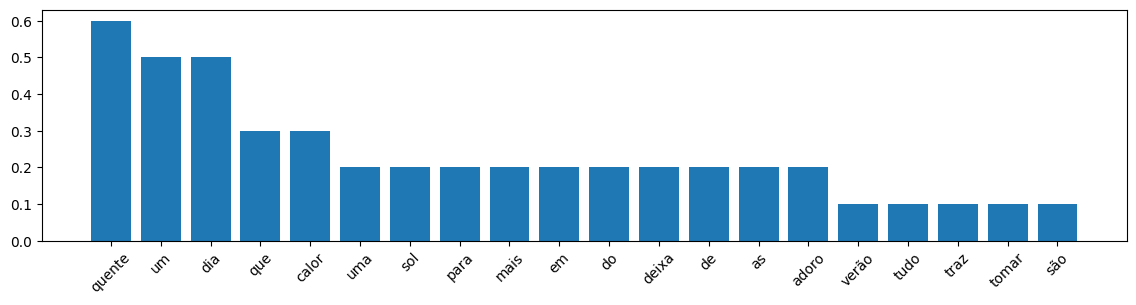

In [19]:
vectorizer = CountVectorizer(binary=True)#valor vai ser 0 ou 1 se a palavra a aparece ou nao
x = vectorizer.fit_transform(frases).todense()
x = np.mean(x, axis=0)

tuplas = [ (x[0,vectorizer.vocabulary_[i]], i) for i in vectorizer.vocabulary_.keys() ]
tuplas_ordenadas = sorted(tuplas, reverse=True)
palavras = [ t[1] for t in tuplas_ordenadas ]
contagens = [ t[0] for t in tuplas_ordenadas ]

n_palavras = 20
eixo_x = np.arange(n_palavras)
plt.figure(figsize=(14,3))
plt.bar(eixo_x[0:n_palavras], contagens[0:n_palavras])
plt.xticks(eixo_x[0:n_palavras], palavras[0:n_palavras], rotation=45)
plt.show()

A palavra "quente" aparece bastante!

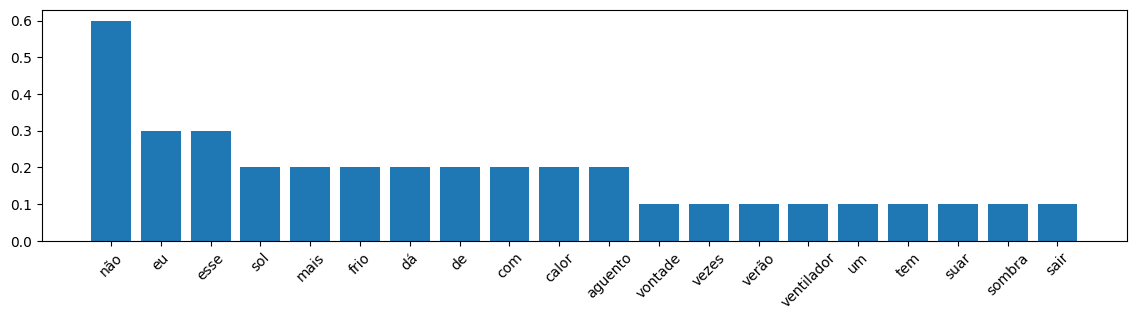

In [20]:
frases_negativas = [
    "Este calor está insuportável!",
    "Eu não aguento mais suar o dia inteiro.",
    "Não dá nem vontade de sair de casa com esse sol quente.",
    "O ar-condicionado não dá conta de refrescar o ambiente.",
    "Até o ventilador parece não estar funcionando direito hoje.",
    "Eu odeio dias assim, prefiro o frio mil vezes!",
    "Não tem um lugar com sombra nessa cidade?",
    "Essa roupa colada no corpo me incomoda demais.",
    "Quero chuva, quero frio, quero qualquer coisa, menos esse sol na minha cabeça!",
    "Já acabou o verão? Porque eu não aguento mais esse calor infernal."
]

vectorizer = CountVectorizer(binary=True)
x = vectorizer.fit_transform(frases_negativas).todense()
x = np.mean(x, axis=0)

tuplas = [ (x[0,vectorizer.vocabulary_[i]], i) for i in vectorizer.vocabulary_.keys() ]
tuplas_ordenadas = sorted(tuplas, reverse=True)
palavras = [ t[1] for t in tuplas_ordenadas ]
contagens = [ t[0] for t in tuplas_ordenadas ]

n_palavras = 20
eixo_x = np.arange(n_palavras)
plt.figure(figsize=(14,3))
plt.bar(eixo_x[0:n_palavras], contagens[0:n_palavras])
plt.xticks(eixo_x[0:n_palavras], palavras[0:n_palavras], rotation=45)
plt.show()

## Exercício 8
**Objetivo: comparar coleções baseado nas palavras usadas**

O dataset `IMDB` possui reviews de filmes classificados como positivos e como negativos.

Faça uma figura mostrando as palavras que são tipicamente usadas em reviews positivas e em reviews negativas.

In [21]:
import pandas as pd

df = pd.read_csv('./datasets/IMDB Dataset.csv')


df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [25]:
positivo = df[df["sentiment"] == 'positive']['review'].to_list()
negativo = df[df["sentiment"] == 'negative']['review'].to_list()

In [23]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

stop_words = nltk.corpus.stopwords.words('english')
stop_words.extend(['br'])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/danielminsonpucciariello/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


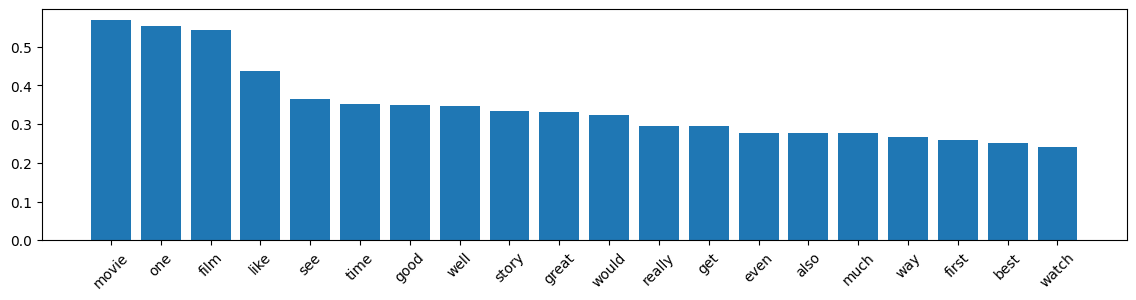

In [26]:
vectorizer = CountVectorizer(binary=True, stop_words=stop_words)
x = vectorizer.fit_transform(positivo[:500]).todense()
x = np.mean(x, axis=0)

tuplas = [ (x[0,vectorizer.vocabulary_[i]], i) for i in vectorizer.vocabulary_.keys() ]
tuplas_ordenadas = sorted(tuplas, reverse=True)
palavras = [ t[1] for t in tuplas_ordenadas ]
contagens = [ t[0] for t in tuplas_ordenadas ]


n_palavras = 20
eixo_x = np.arange(n_palavras)
plt.figure(figsize=(14,3))
plt.bar(eixo_x[0:n_palavras], contagens[0:n_palavras])
plt.xticks(eixo_x[0:n_palavras], palavras[0:n_palavras], rotation=45)
plt.show()

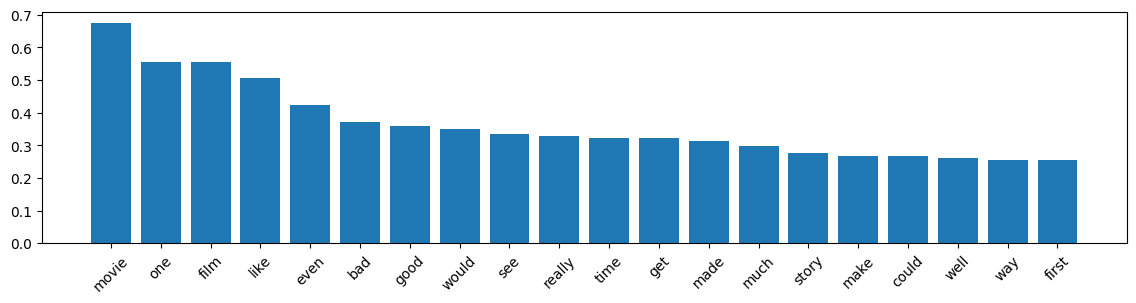

In [27]:
vectorizer = CountVectorizer(binary=True, stop_words=stop_words)
x = vectorizer.fit_transform(negativo[:500]).todense()
x = np.mean(x, axis=0)

tuplas = [ (x[0,vectorizer.vocabulary_[i]], i) for i in vectorizer.vocabulary_.keys() ]
tuplas_ordenadas = sorted(tuplas, reverse=True)
palavras = [ t[1] for t in tuplas_ordenadas ]
contagens = [ t[0] for t in tuplas_ordenadas ]


n_palavras = 20
eixo_x = np.arange(n_palavras)
plt.figure(figsize=(14,3))
plt.bar(eixo_x[0:n_palavras], contagens[0:n_palavras])
plt.xticks(eixo_x[0:n_palavras], palavras[0:n_palavras], rotation=45)
plt.show()